# Assignment 7 
by [Jay Nakum](https://jaynakum.github.io) [20BCP304D]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('./datasets/Credit Card Dataset for Clustering.csv')
data.head()

In [6]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
data.isna().any()

In [ ]:
fig = plt.figure(figsize=(30, 30), dpi=300)
mat = data.corr()
sns.heatmap(mat, annot=True);

In [ ]:
X=data.drop('CUST_ID',axis=1)
X

In [ ]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
X=sca.fit_transform(X)
X

In [11]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

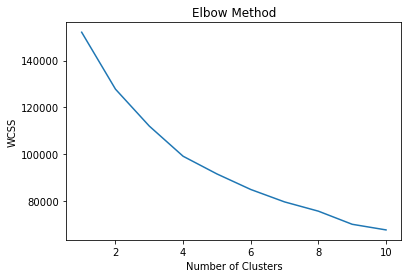

In [13]:
n=[]
for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(X)
    n.append(kmean.inertia_)
plt.plot(range(1,11),n)
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

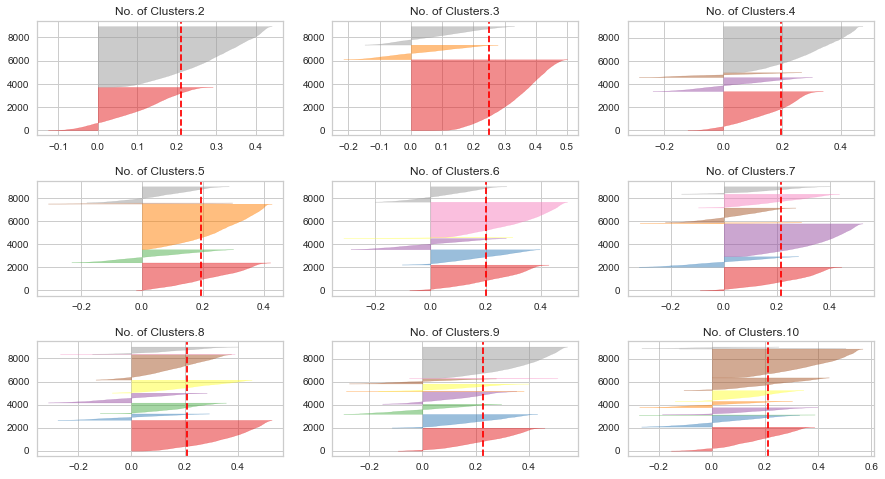

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3,3, figsize=(15,8))
ax = ax.ravel() #ax is 2D ravel will convert it into 1D
plt.subplots_adjust(hspace=0.4)
m=0
for i in [2,3,4,5,6,7,8,9,10]:
    km=KMeans(n_clusters=i, init='k-means++', random_state=0)
    ax[m].set_title("No. of Clusters.{}".format(i))
    vis=SilhouetteVisualizer(km, ax=ax[m])
    m=m+1
    vis.fit(X)

In [3]:
model=KMeans(n_clusters=3, random_state=0)
y=model.fit_predict(X)
from sklearn.metrics import silhouette_score
silhouette_score(X,y)

NameError: name 'KMeans' is not defined